In [1]:
# 基础库导入
from __future__ import print_function
from __future__ import division

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets
%matplotlib inline

import os
import sys
# 使用insert 0即只使用github，避免交叉使用了pip安装的abupy，导致的版本不一致问题
sys.path.insert(0, os.path.abspath('../'))
import abupy





基础的数据获取，如下：

In [2]:
from abupy import abu, EMarketTargetType, AbuMetricsBase, ABuMarketDrawing, ABuProgress, ABuSymbolPd, get_price, ABuIndustries
from abupy import EMarketDataFetchMode, EDataCacheType, EMarketSourceType, FuturesBaseMarket, TCBaseMarket, ABuDateUtil
from abupy import AbuDataParseWrap, StockBaseMarket, SupportMixin, ABuNetWork, Symbol, code_to_symbol

abupy.env.g_market_target = EMarketTargetType.E_MARKET_TARGET_CN
abupy.env.g_data_fetch_mode = EMarketDataFetchMode.E_DATA_FETCH_FORCE_NET

abupy.env.g_market_source = EMarketSourceType.E_MARKET_SOURCE_tx
abupy.env.g_data_cache_type = EDataCacheType.E_DATA_CACHE_CSV

In [3]:
downloadNow = False
if downloadNow:
    print("downloading...")
    abu.run_kl_update(start='2014-07-01', end='2020-07-01', market=EMarketTargetType.E_MARKET_TARGET_CN, n_jobs=10)
else:
    print("neednot download")

neednot download


测试获取到的数据：

In [4]:
abupy.env.g_data_fetch_mode = EMarketDataFetchMode.E_DATA_FETCH_FORCE_LOCAL

In [5]:
df = ABuSymbolPd.make_kl_df('sz002385')
df.tail()

,open,close,high,low,volume,date,pre_close,date_week,p_change,atr21,atr14,key
2020-06-23,9.81,9.05,9.85,9.02,4390657,20200623,9.94,1,-8.954,0.6015,0.6570,499
2020-06-24,9.08,8.86,9.16,8.66,2315919,20200624,9.05,2,-2.099,0.6632,0.7401,500
2020-06-29,8.95,8.91,9.15,8.85,1993947,20200629,8.86,0,0.564,0.6301,0.6814,501
2020-06-30,8.94,9.11,9.18,8.82,1794900,20200630,8.91,1,2.245,0.6056,0.6386,502
2020-07-01,9.01,9.01,9.18,8.94,1811458,20200701,9.11,2,-1.098,0.5751,0.5894,503


In [6]:
from abupy import AbuBenchmark
benchmark = AbuBenchmark(start='2014-07-01', end='2020-07-01')


In [7]:
print(benchmark.kl_pd.index)
type(benchmark.kl_pd.index)

DatetimeIndex(['2014-07-01', '2014-07-02', '2014-07-03', '2014-07-04',
               '2014-07-07', '2014-07-08', '2014-07-09', '2014-07-10',
               '2014-07-11', '2014-07-14',
               ...
               '2020-06-16', '2020-06-17', '2020-06-18', '2020-06-19',
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', length=1463, freq=None)


pandas.core.indexes.datetimes.DatetimeIndex

进行回测：

In [8]:
from abupy import AbuFactorAtrNStop, AbuFactorPreAtrNStop, AbuFactorCloseAtrNStop, AbuFactorBuyBreak
from abupy import abu, EMarketTargetType, AbuMetricsBase, ABuMarketDrawing, ABuProgress, ABuSymbolPd
from abupy import EMarketTargetType, EDataCacheType, EMarketSourceType, EMarketDataFetchMode, EStoreAbu, AbuUmpMainMul
from abupy import AbuUmpMainDeg, AbuUmpMainJump, AbuUmpMainPrice, AbuUmpMainWave, feature, AbuFeatureDegExtend
from abupy import AbuUmpEdgeDeg, AbuUmpEdgePrice, AbuUmpEdgeWave, AbuUmpEdgeFull, AbuUmpEdgeMul, AbuUmpEegeDegExtend
from abupy import AbuUmpMainDegExtend, ump


# 初始化资金10万
read_cash = 100000

# 买入因子依然延用向上突破因子
buy_factors = [{'xd': 60, 'class': AbuFactorBuyBreak},
               {'xd': 42, 'class': AbuFactorBuyBreak}]

# 卖出因子继续使用上一节使用的因子
sell_factors = [
    {'stop_loss_n': 1.0, 'stop_win_n': 3.0,
     'class': AbuFactorAtrNStop},
    {'class': AbuFactorPreAtrNStop, 'pre_atr_n': 1.5},
    {'class': AbuFactorCloseAtrNStop, 'close_atr_n': 1.5}
]
abupy.env.g_market_target = EMarketTargetType.E_MARKET_TARGET_CN
abupy.env.g_data_fetch_mode = EMarketDataFetchMode.E_DATA_FETCH_FORCE_LOCAL

In [9]:
#choice_symbols = None
choice_symbols = ["sz002385","sz002223","sz300058","sz000997","sz300159","sh600316",]
abu_result_tuple, _ = abu.run_loop_back(read_cash,
                                            buy_factors,
                                            sell_factors,
                                            choice_symbols=choice_symbols,
                                            start='2017-07-01', end='2020-07-01')

Box(children=(Text(value='pid=10648 begin work'), FloatProgress(value=0.0)))

Box(children=(Text(value='pid=10645 begin work'), FloatProgress(value=0.0)))

Box(children=(Text(value='pid=10649 begin work'), FloatProgress(value=0.0)))

Box(children=(Text(value='pid=10646 begin work'), FloatProgress(value=0.0)))

Box(children=(Text(value='pid=10650 begin work'), FloatProgress(value=0.0)))

Box(children=(Text(value='pid=10647 begin work'), FloatProgress(value=0.0)))

capital.apply_action::0.83%

FloatProgress(value=0.0)

/Users/zhushuqiong/anaconda/envs/abu/lib/python3.7/site-packages/jupyter_client/jsonutil.py:66: DeprecationWarning: Interpreting naive datetime as local 2020-07-05 17:18:09.549720. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)
买入后卖出的交易数量:59
买入后尚未卖出的交易数量:3
胜率:45.7627%
平均获利期望:12.3654%
平均亏损期望:-8.6042%
盈亏比:1.3943
策略收益: 7.1668%
基准收益: -5.2364%
策略年化收益: 2.4740%
基准年化收益: -1.8076%
策略买入成交比例:83.8710%
策略资金利用率比例:17.9335%
策略共执行730个交易日


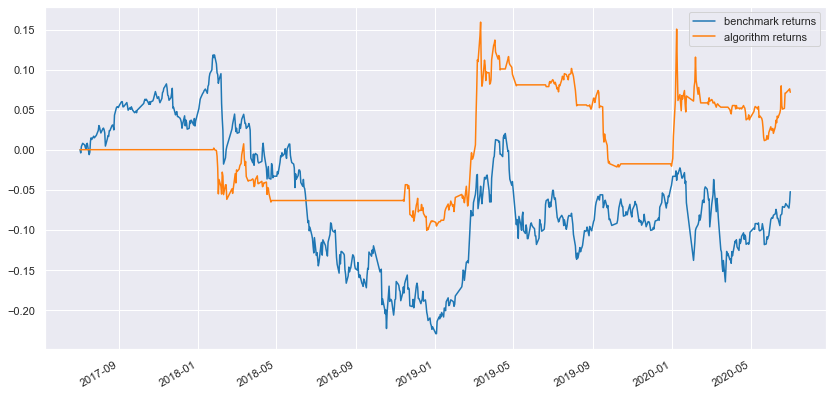

In [10]:
AbuMetricsBase.show_general(*abu_result_tuple, only_show_returns=True)

In [11]:
orders_pd = abu_result_tuple.orders_pd
orders_pd

/Users/zhushuqiong/anaconda/envs/abu/lib/python3.7/site-packages/jupyter_client/jsonutil.py:66: DeprecationWarning: Interpreting naive datetime as local 2020-07-05 17:18:09.555856. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


,buy_date,buy_price,buy_cnt,buy_factor,symbol,buy_pos,buy_type_str,expect_direction,sell_type_extra,sell_date,sell_price,sell_type,ml_features,key,profit,result,profit_cg,profit_cg_hunder,keep_days
2018-01-24,20180124,6.6895,2800.0,AbuFactorBuyBreak:42,sz002385,AbuAtrPosition,call,1.0,AbuFactorPreAtrNStop:pre_atr=1.5,20180202,6.2760,loss,None,141,-1157.8,-1,-0.0618,-6.1813,9
2018-01-25,20180125,21.5165,900.0,AbuFactorBuyBreak:42,sz002223,AbuAtrPosition,call,1.0,AbuFactorCloseAtrNStop:close_atr_n=1.5,20180316,21.6105,win,None,142,84.6,1,0.0044,0.4369,50
2018-01-26,20180126,6.8225,2800.0,AbuFactorBuyBreak:60,sz002385,AbuAtrPosition,call,1.0,AbuFactorAtrNStop:stop_loss=1.0,20180202,6.2760,loss,None,143,-1530.2,-1,-0.0801,-8.0103,7
2018-01-29,20180129,7.6500,1400.0,AbuFactorBuyBreak:60,sz300058,AbuAtrPosition,call,1.0,AbuFactorCloseAtrNStop:close_atr_n=1.5,20180320,7.4260,loss,None,144,-313.6,-1,-0.0293,-2.9281,50
2018-01-29,20180129,7.6500,1400.0,AbuFactorBuyBreak:42,sz300058,AbuAtrPosition,call,1.0,AbuFactorCloseAtrNStop:close_atr_n=1.5,20180320,7.4260,loss,None,144,-313.6,-1,-0.0293,-2.9281,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-12,20200512,7.0000,1400.0,AbuFactorBuyBreak:42,sz300058,AbuAtrPosition,call,1.0,AbuFactorCloseAtrNStop:close_atr_n=1.5,20200624,7.8950,win,None,695,1253.0,1,0.1279,12.7857,43
2020-05-19,20200519,14.0900,1200.0,AbuFactorBuyBreak:42,sh600316,AbuAtrPosition,call,1.0,,0,NaN,keep,None,700,NaN,0,NaN,NaN,47
2020-06-05,20200605,7.5500,1300.0,AbuFactorBuyBreak:60,sz300058,AbuAtrPosition,call,1.0,AbuFactorCloseAtrNStop:close_atr_n=1.5,20200624,7.8950,win,None,713,448.5,1,0.0457,4.5695,19
2020-06-16,20200616,14.4400,1300.0,AbuFactorBuyBreak:60,sh600316,AbuAtrPosition,call,1.0,,0,NaN,keep,None,720,NaN,0,NaN,NaN,19


In [12]:
view_orders = orders_pd[(orders_pd['symbol'] == 'sz300058') & (orders_pd['buy_date'] == 20200512)]
view_orders

/Users/zhushuqiong/anaconda/envs/abu/lib/python3.7/site-packages/jupyter_client/jsonutil.py:66: DeprecationWarning: Interpreting naive datetime as local 2020-07-05 17:18:09.565230. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


,buy_date,buy_price,buy_cnt,buy_factor,symbol,buy_pos,buy_type_str,expect_direction,sell_type_extra,sell_date,sell_price,sell_type,ml_features,key,profit,result,profit_cg,profit_cg_hunder,keep_days
2020-05-12,20200512,7.0,1400.0,AbuFactorBuyBreak:42,sz300058,AbuAtrPosition,call,1.0,AbuFactorCloseAtrNStop:close_atr_n=1.5,20200624,7.895,win,None,695,1253.0,1,0.1279,12.7857,43


/Users/zhushuqiong/anaconda/envs/abu/lib/python3.7/site-packages/jupyter_client/jsonutil.py:66: DeprecationWarning: Interpreting naive datetime as local 2020-07-05 17:18:09.572189. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


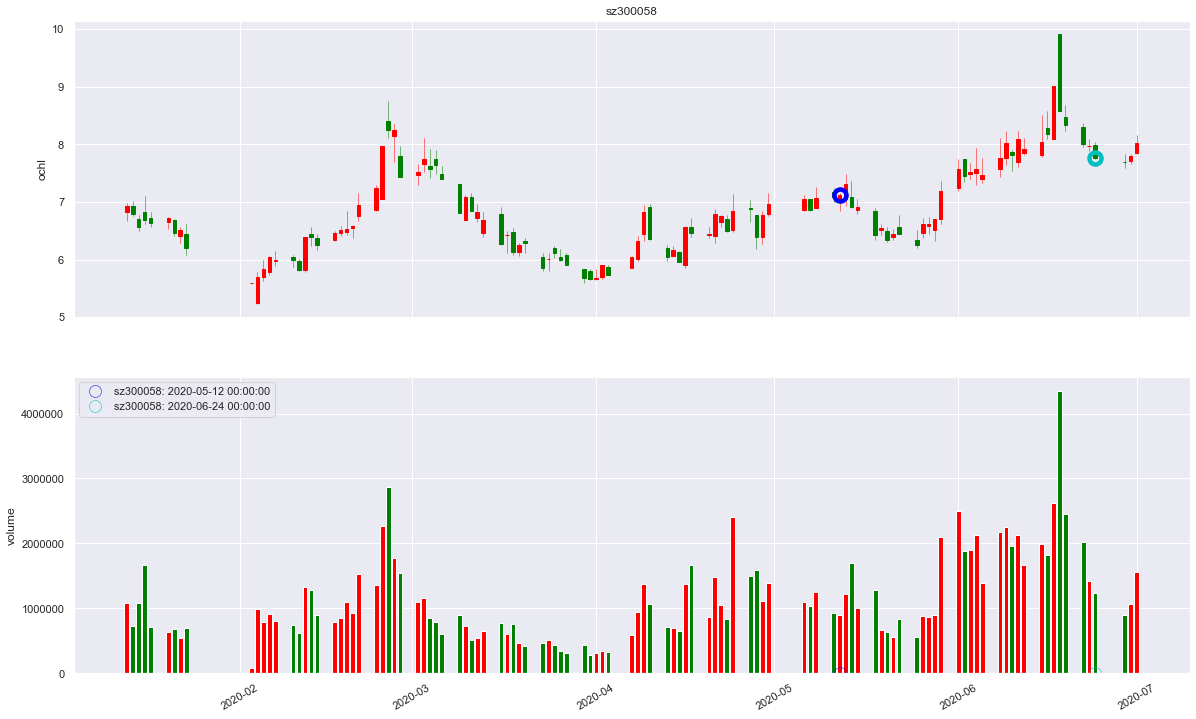

In [13]:
trade_df = ABuMarketDrawing.plot_candle_from_order(view_orders)